### Import Libraries

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from IPython.display import Image

### Load the Image

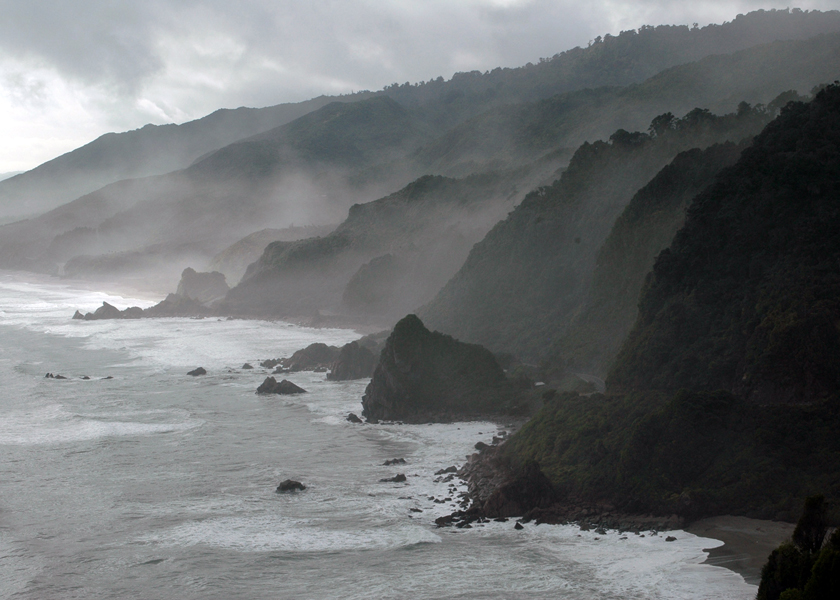

In [8]:
image = cv.imread("Images/New_Zealand_Coast.jpg", 1)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

Image(filename="Images/New_Zealand_Coast.jpg")

### Addition or Brightness

Text(0.5, 1.0, 'Brighter Image')

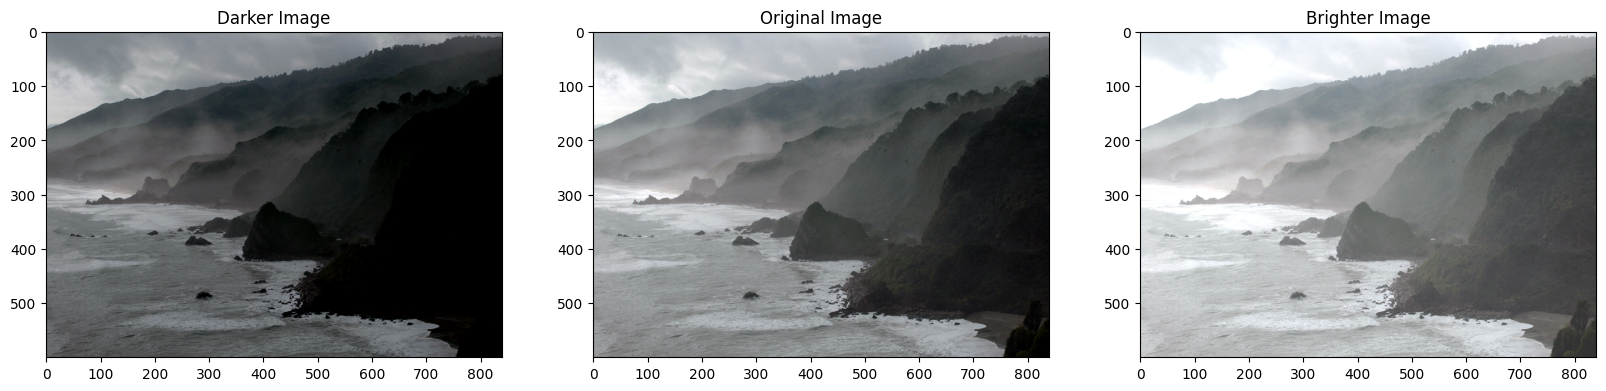

In [9]:
'''
1. Form a matrix of same shape as the image and multiply it by pixel intensity.
2. Add or Subtract the matrix from the Original Image. 
'''

matrix = np.ones(image_rgb.shape, dtype="uint8") * 50

bright_image = cv.add(image_rgb, matrix)
darker_image = cv.subtract(image_rgb, matrix)

plt.figure(figsize=[20,5])
plt.subplot(131); plt.imshow(darker_image); plt.title("Darker Image");
plt.subplot(132); plt.imshow(image_rgb); plt.title("Original Image");
plt.subplot(133); plt.imshow(bright_image); plt.title("Brighter Image")

### Multiplication or Contrast

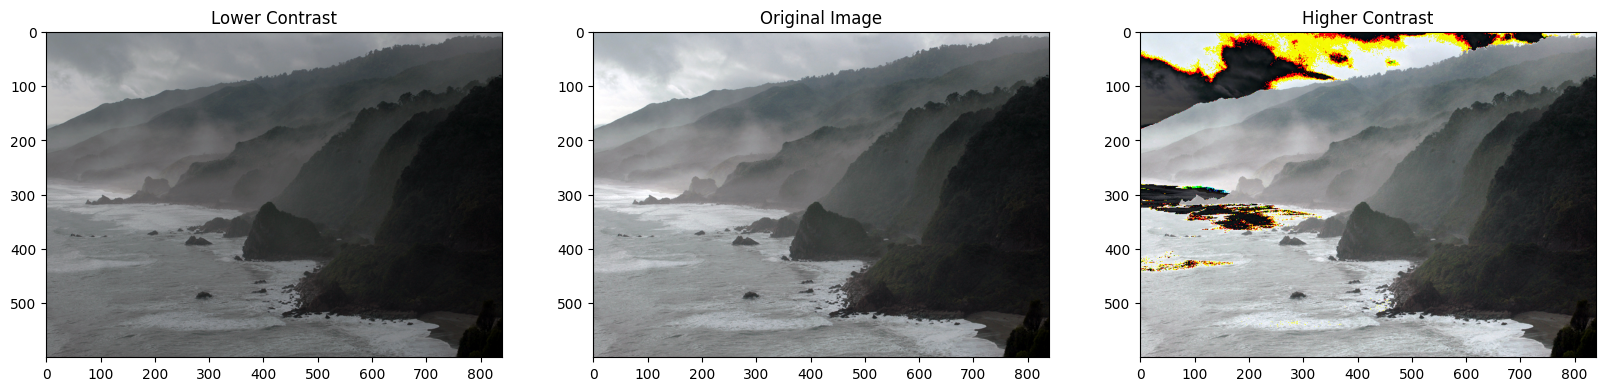

In [10]:
'''
1. Form a matrix of same size as original image.
2. Multiply matrix with multiplying factor (large > 1 > small).
3. Multiply image with the matrix.

return:
higher contrast (multiplying factor > 1)
lower contrast (multiplying factor < 1)
'''

matrix1 = np.ones(image_rgb.shape) * 0.75
matrix2 = np.ones(image_rgb.shape) * 1.30

higher_contrast = np.uint8(cv.multiply(np.float64(image_rgb), matrix2));
lower_contrast = np.uint8(cv.multiply(np.float64(image_rgb), matrix1));

plt.figure(figsize=[20,5])
plt.subplot(131); plt.imshow(lower_contrast); plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(image_rgb); plt.title("Original Image");
plt.subplot(133); plt.imshow(higher_contrast); plt.title("Higher Contrast");

In higher contrast image, weird colors are there because they are going higher than 255. To handle this issue we use np.clip

### Handling Overflow using np.clip

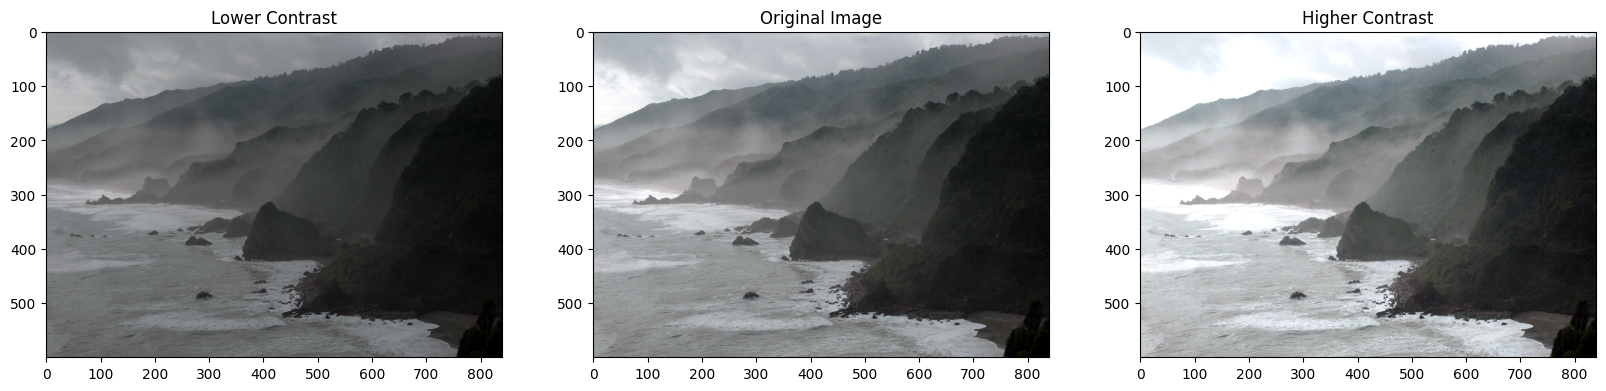

In [11]:
matrix1 = np.ones(image_rgb.shape) * 0.75
matrix2 = np.ones(image_rgb.shape) * 1.30

higher_contrast = np.uint8(np.clip(cv.multiply(np.float64(image_rgb), matrix2), 0,255));
lower_contrast = np.uint8(cv.multiply(np.float64(image_rgb), matrix1));

plt.figure(figsize=[20,5])
plt.subplot(131); plt.imshow(lower_contrast); plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(image_rgb); plt.title("Original Image");
plt.subplot(133); plt.imshow(higher_contrast); plt.title("Higher Contrast");

### Image Thresholding